$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 5 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [2]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import random
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.impute import KNNImputer ,SimpleImputer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [3]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


In [4]:
train.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
train.dtypes
#seeing the types of train columns

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

we can see that some types are object type but thwy must be transformed to float

In [7]:
train.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

there are a lot of nan values that need to be handled

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


data has outliers 

In [9]:
train.duplicated().sum()

0

In [10]:
object_col = train.describe(include='O').columns
object_col

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [11]:
for col in object_col:
    print('Column Name: '+col)
    print("**"*20)
    print(train[col].value_counts(dropna=False))
    print('END', "--"*18, '\n')

Column Name: ID
****************************************
ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64
END ------------------------------------ 

Column Name: Customer_ID
****************************************
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64
END ------------------------------------ 

Column Name: Month
****************************************
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
END ------------------------------------ 

Column Name: Name
****************************************
Name
NaN               9985
Stevex  

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

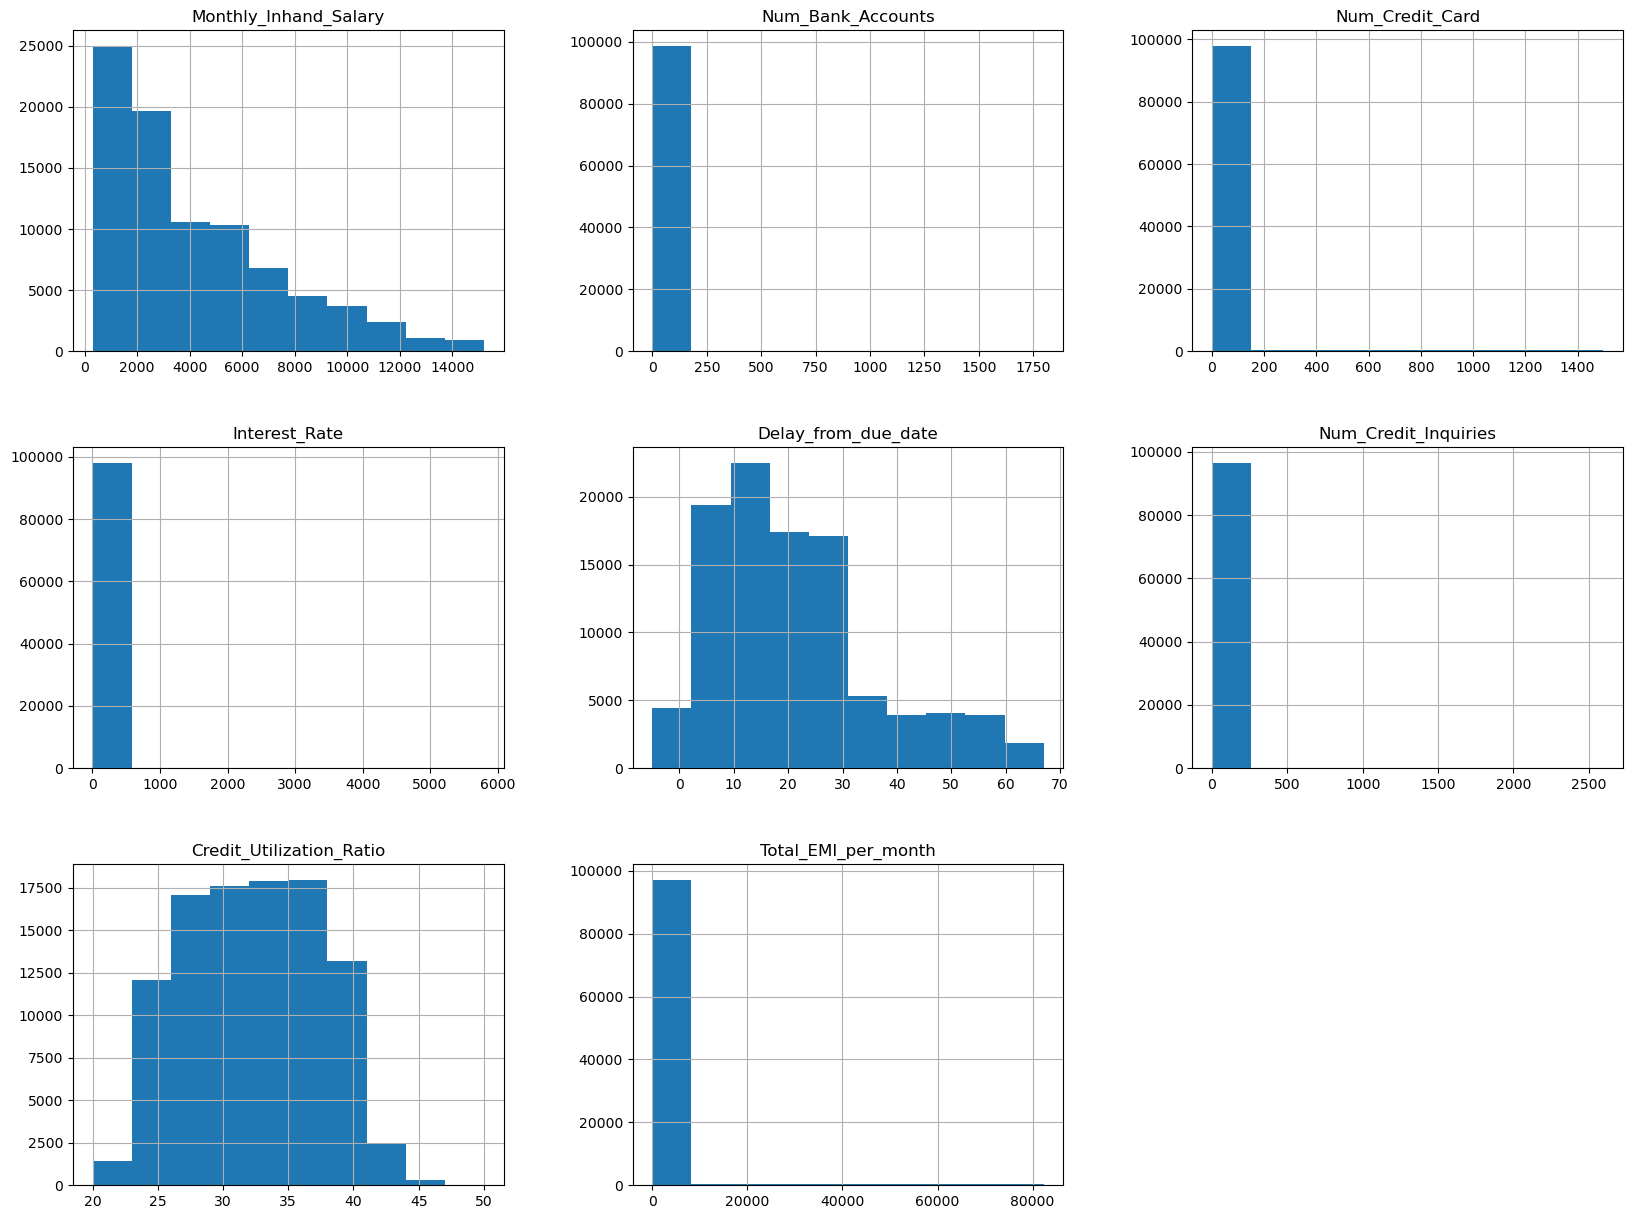

In [12]:
train.hist(figsize=(20,15))
plt.show()

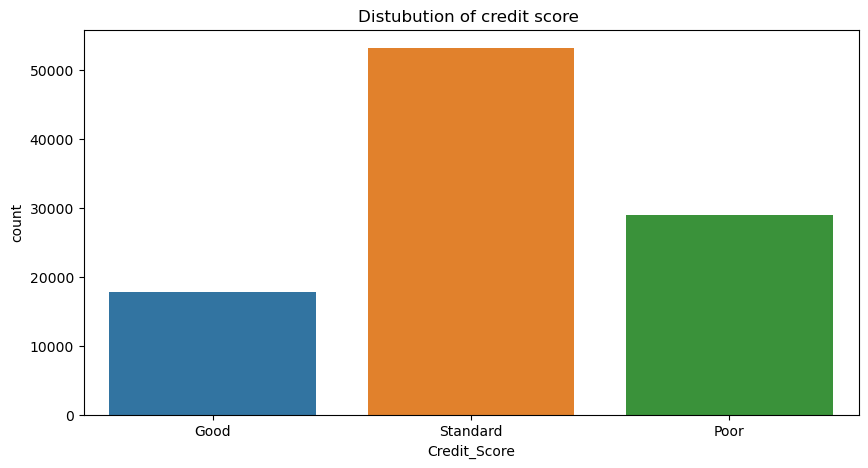

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=train , x='Credit_Score')
plt.title("Distubution of credit score ")
plt.show()

most of the credit score distribution is standered 

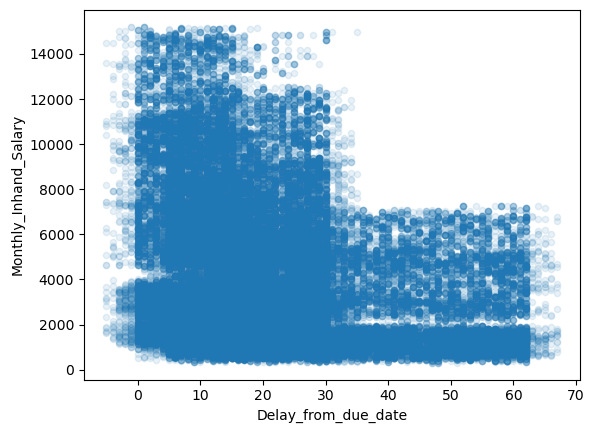

In [14]:
train.plot(kind="scatter",x="Delay_from_due_date",y="Monthly_Inhand_Salary",alpha=0.1);

we can say that the less the salary  the more the delay is 

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

`Note:` You can take a sample from the training data to make the model training and fine-tuning faster.

Hints:
- It could be helpful to check `sklearn.preprocessing` module.

#### deleting unnecessary columns

In [15]:
garbage_columns=['ID','Customer_ID','Month','Name','SSN','Type_of_Loan','Credit_History_Age','Num_of_Loan','Credit_Score']
train = train.drop(garbage_columns, axis=1)



### Removing strange values

In [16]:
def text_cleaning(data):
    if data is np.NaN or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')

In [17]:
train = train.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
train

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,1824.843333,3,4,3,3,7,11.27,4.0,NaN,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663
1,23,Scientist,19114.12,NaN,3,4,3,-1,NaN,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184
2,-500,Scientist,19114.12,NaN,3,4,3,3,7,NaN,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912
3,23,Scientist,19114.12,NaN,3,4,3,5,4,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786
4,23,Scientist,19114.12,1824.843333,3,4,3,6,NaN,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359.415833,4,6,7,23,7,11.5,3.0,NaN,502.38,34.663572,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228
99996,25,Mechanic,39628.99,3359.415833,4,6,7,18,7,11.5,3.0,NaN,502.38,40.565631,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161
99997,25,Mechanic,39628.99,3359.415833,4,6,5729,27,6,11.5,3.0,Good,502.38,41.255522,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083
99998,25,Mechanic,39628.99,3359.415833,4,6,7,20,NaN,11.5,3.0,Good,502.38,33.638208,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979


### Correcting columns data types

In [18]:
train['Age']                     = train.Age.astype(float) 
train['Annual_Income']           = train.Annual_Income.astype(float)
train['Num_of_Delayed_Payment']  = train.Num_of_Delayed_Payment.astype(float)
train['Changed_Credit_Limit']    = train.Changed_Credit_Limit.astype(float)
train['Outstanding_Debt']        = train.Outstanding_Debt.astype(float)
train['Amount_invested_monthly'] = train.Amount_invested_monthly.astype(float)
train['Monthly_Balance']         = train.Monthly_Balance.astype(float)

In [19]:
train.dtypes

Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
dtype: object

### Handling missing values 

In [20]:
from sklearn.impute import SimpleImputer
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='median')


In [21]:


    numerical_columns = train.select_dtypes(include=['float', 'int']).columns
    categorical_columns = train.select_dtypes(include=['object']).columns

 
    train[numerical_columns] = numerical_imputer.fit_transform(train[numerical_columns])

    
    train[categorical_columns] = categorical_imputer.fit_transform(train[categorical_columns])



In [22]:
train.Payment_of_Min_Amount.replace('NM',np.NaN,inplace = True)

In [23]:
train.isna().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount       12007
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
dtype: int64

### Handling outliers

In [24]:
train['Age'].value_counts()


Age
38.0      2994
28.0      2968
31.0      2955
26.0      2945
32.0      2884
          ... 
1908.0       1
4583.0       1
7549.0       1
3119.0       1
1342.0       1
Name: count, Length: 1728, dtype: int64

In [25]:
def replace_outliers_with_value(df, column, replacement_value):
   
    mean = df[column].mean()
    std_dev = df[column].std()
    
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev
    for i in train.Age:
         if i < lower_bound or i > upper_bound:
                train.Age.replace(i,replacement_value)
        
#     df[column] = df[column].apply(lambda x: replacement_value if x < lower_bound or x > upper_bound else x)
    
    return df


In [26]:
train=replace_outliers_with_value(train,'Age',35)

In [27]:
bank_acc = [0,1,2,3,4,5,6,7,8,9]
for num in train.Num_Bank_Accounts:
    if num not in bank_acc:
        train.Num_Bank_Accounts.replace(num,random.choice(bank_acc),inplace = True)

In [28]:
train.dtypes

Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
dtype: object

### Encodeing object columns

In [29]:
cat_columns = train.select_dtypes(include=['object']).columns
cat_columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object')

In [30]:
train['Occupation'].value_counts()

Occupation
Lawyer           13637
Architect         6355
Engineer          6350
Scientist         6299
Mechanic          6291
Accountant        6271
Developer         6235
Media_Manager     6232
Teacher           6215
Entrepreneur      6174
Doctor            6087
Journalist        6085
Manager           5973
Musician          5911
Writer            5885
Name: count, dtype: int64

In [31]:
label_encoder = LabelEncoder()
hot_encoder=OneHotEncoder()
train['Occupation']=label_encoder.fit_transform(train['Occupation']).reshape(-1,1)
train['Credit_Mix']=label_encoder.fit_transform(train['Credit_Mix'])
train['Payment_of_Min_Amount']=label_encoder.fit_transform(train['Payment_of_Min_Amount'])
train['Payment_Behaviour']=label_encoder.fit_transform(train['Payment_Behaviour'])

In [32]:
train.dtypes

Age                         float64
Occupation                    int32
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int32
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount         int32
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int32
Monthly_Balance             float64
dtype: object

In [33]:
train_n=pd.read_csv('Data/train.csv')

In [34]:
y = train_n['Credit_Score']
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)

### Removing negative values 

In [35]:
for balance in train['Monthly_Balance']:
    if balance < 0 :
        train['Monthly_Balance'].replace(balance,-balance,inplace = True)

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [36]:
del_columns=['ID','Customer_ID','Month','Name','SSN','Type_of_Loan','Credit_History_Age','Num_of_Loan']
test=test.drop(del_columns,axis=1)

In [37]:
test = test.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
test

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,1824.843333,3,4,3,3,7,11.27,2022.0,Good,809.98,35.030402,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,24,Scientist,19114.12,1824.843333,3,4,3,3,9,13.27,4.0,Good,809.98,33.053114,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,24,Scientist,19114.12,1824.843333,3,4,3,-1,4,12.27,4.0,Good,809.98,33.811894,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,24,Scientist,19114.12,NaN,3,4,3,4,5,11.27,4.0,Good,809.98,32.430559,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,28,NaN,34847.84,3037.986667,2,4,6,3,1,5.42,5.0,Good,605.03,25.926822,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4975,Architect,20002.88,1929.906667,10,8,29,33,25,18.31,12.0,NaN,3571.7,34.780553,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,25,Mechanic,39628.99,NaN,4,6,7,20,NaN,11.5,7.0,Good,502.38,27.758522,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,25,Mechanic,39628.99,3359.415833,4,6,7,23,5,13.5,7.0,Good,502.38,36.858542,No,35.104023,10000,Low_spent_Large_value_payments,349.7263321025098
49998,25,Mechanic,39628.99,NaN,4,6,7,21,6,11.5,7.0,Good,502.38,39.139840,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


In [38]:
test['Age']                     = test.Age.astype(float) 
test['Annual_Income']           = test.Annual_Income.astype(float)
test['Num_of_Delayed_Payment']  = test.Num_of_Delayed_Payment.astype(float)
test['Changed_Credit_Limit']    = test.Changed_Credit_Limit.astype(float)
test['Outstanding_Debt']        = test.Outstanding_Debt.astype(float)
test['Amount_invested_monthly'] = test.Amount_invested_monthly.astype(float)
test['Monthly_Balance']         = test.Monthly_Balance.astype(float)

In [39]:
test.Payment_of_Min_Amount.replace('NM',np.NaN,inplace = True)

In [40]:
test.dtypes

Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
dtype: object

In [41]:
test.isna().sum()

Age                            0
Occupation                  3438
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit        1059
Num_Credit_Inquiries        1035
Credit_Mix                  9805
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount       5993
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour           3800
Monthly_Balance              562
dtype: int64

In [42]:
test=replace_outliers_with_value(test,'Age',35)

In [43]:
for balance in test['Monthly_Balance']:
    if balance < 0 :
        test['Monthly_Balance'].replace(balance,-balance,inplace = True)

----------------------

# `05` Decision Tree Classifier

Using `sklearn` implementation of decision tree classifiers to model the data.

Hint: Look for `sklearn.tree.DecisionTreeClassifier` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 1234$

In [44]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
clf = DecisionTreeClassifier(random_state=1234)

In [48]:
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1234)

In [49]:
y_pred = clf.predict(X_test)


## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

`Note:` Make sure to evaluate the model on unseen data (e.g., use validation set, cross validation, etc.)

`Q` Which metric is more reliable?

`Q` Does these values necessarily mean a good model?

In [51]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)


In [52]:

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6849
Precision: 0.685104901887129
Recall: 0.6849
F1 Score: 0.6849842436972172
Confusion Matrix:
[[2106  185 1236]
 [ 202 3936 1736]
 [1276 1667 7656]]


## `iii` Regularization Mode: On

Let's try contraining the model a bit. Change the default $max_depth$ parameter.

`Q` Does this simple regularization make the model generalize better?

In [68]:
clf = DecisionTreeClassifier(max_depth=10)

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.6986875 0.710375  0.701     0.7075    0.70575  ]
Mean CV Score: 0.7046625000000001


In [71]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [72]:
y_pred = clf.predict(X_test)


In [73]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [74]:

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.70045
Precision: 0.7010337822360987
Recall: 0.70045
F1 Score: 0.6997909793320094
Confusion Matrix:
[[2084  101 1342]
 [ 341 3815 1718]
 [1170 1319 8110]]


i tried max_depth = 3 ,7 ,10 and it apperes that 10 layers lead to better results

## `iv` Tuning Hyperparameters

Try different **reasonable & logical** regularization hyperparameter values and evaluate.

`Q` What is the best hyperparamters value combination?

`Note:` Make sure to tune only reasonable hyperparameter values as per the dataset characteristics.

`Note:` Make sure you elaborate your reasoning behind selecting each of the hyperparameters.

`Hint:` You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

`Hint:` It could be useful, and time saving, to start the tuning with a wider range using `RandomizedSearchCV` then switch to a finer range using `GridSearchCV` once you have found the near optimal area for the hyperparameter.

In [78]:
from sklearn.model_selection import  RandomizedSearchCV

In [79]:
clf = DecisionTreeClassifier()

In [88]:
param_grid = {
    'max_depth': [3, 5,10,15, None],  # Depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum samples required at each leaf node
}

In [89]:
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [3, 5, 10, 15, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='accuracy')

In [90]:
print(random_search.best_params_)#best hyperparameter values combination

{'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 15}


In [91]:
best_model=random_search.best_estimator_

In [92]:
y_pred = best_model.predict(X_test)

In [93]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [94]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.70585
Precision: 0.7046041803769092
Recall: 0.70585
F1 Score: 0.7049472731264416
Confusion Matrix:
[[2052  121 1354]
 [ 269 4013 1592]
 [1041 1506 8052]]


## `v` Feature Importance

Explore the feature importances calculated by the best model.

`Note:` Visualizing the importances would help extract insights.

`Q` Do the importance values make sense?

`Q` Can you intrepet the importance of the few top features?

In [95]:
feature_importances = best_model.feature_importances_

In [97]:
feature_names = list(train_n.columns)

In [98]:
sorted_indices = np.argsort(feature_importances)[::-1]


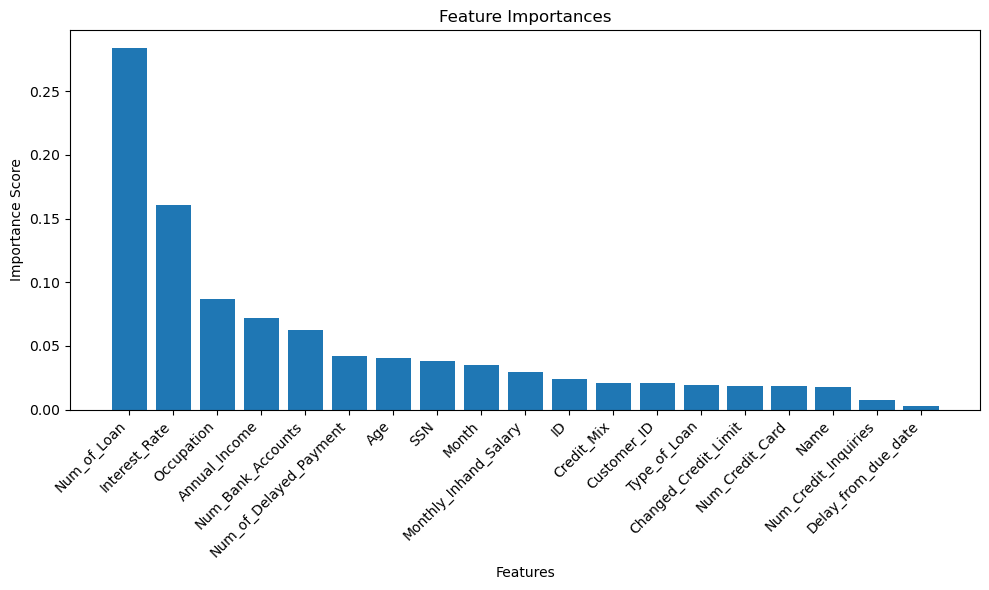

In [99]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [100]:
y_pred = best_model.predict(X_test)

In [101]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [102]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.70585
Precision: 0.7046041803769092
Recall: 0.70585
F1 Score: 0.7049472731264416
Confusion Matrix:
[[2052  121 1354]
 [ 269 4013 1592]
 [1041 1506 8052]]


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$